In [17]:
from netCDF4 import Dataset
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
import warnings
import kuka_tools as kt
# You can find kuka_tools at https://github.com/robbiemallett/custom_modules/blob/master/kuka_tools.py

In [18]:
directory = '../data/PROCESSED'

pits = {}

# PIT 1

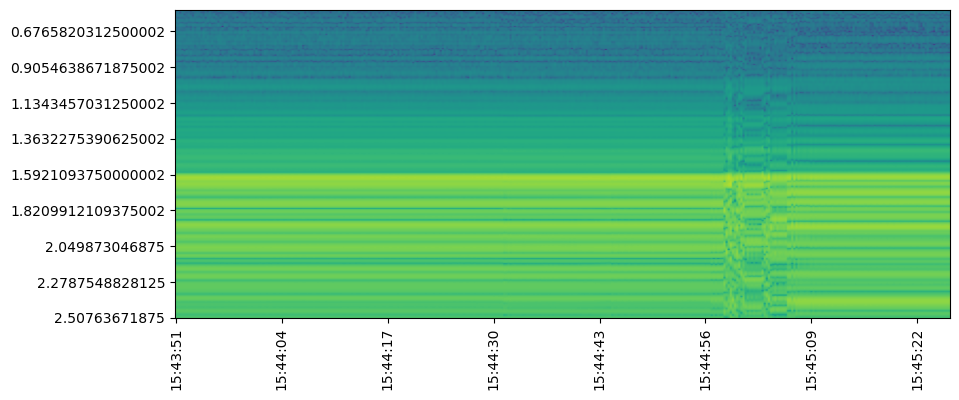

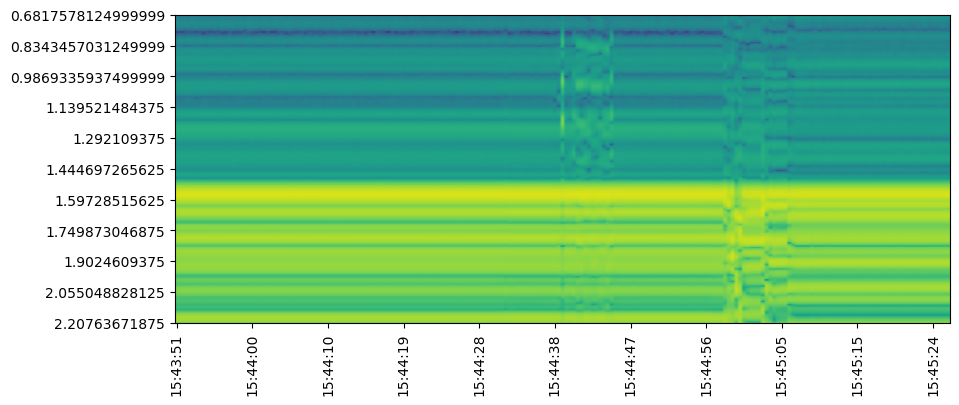

In [19]:
ka_f = 'kuka_stare_decon_Ka-Scat20230807-154351.nc'

kt.plot_file(ka_f,'ka',directory=directory)

ku_f = 'kuka_stare_decon_Ku-Scat20230807-154351.nc'

kt.plot_file(ku_f,'ku',directory=directory)

In [20]:
pitno = 1
pits[pitno] = {}
pits[pitno]['ka'] = (15,45,15)
pits[pitno]['ku'] = (15,44,0)
pits[pitno]['ku_file'] = ku_f
pits[pitno]['ka_file'] = ka_f
pits[pitno]['directory'] = directory

# PIT 5

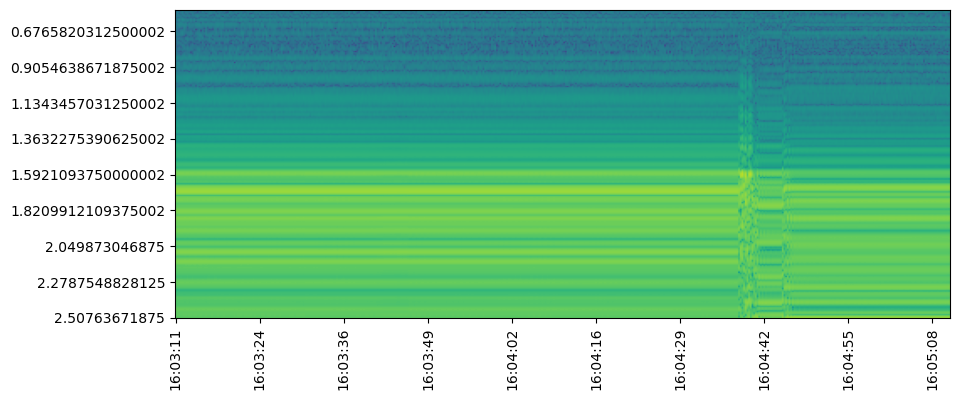

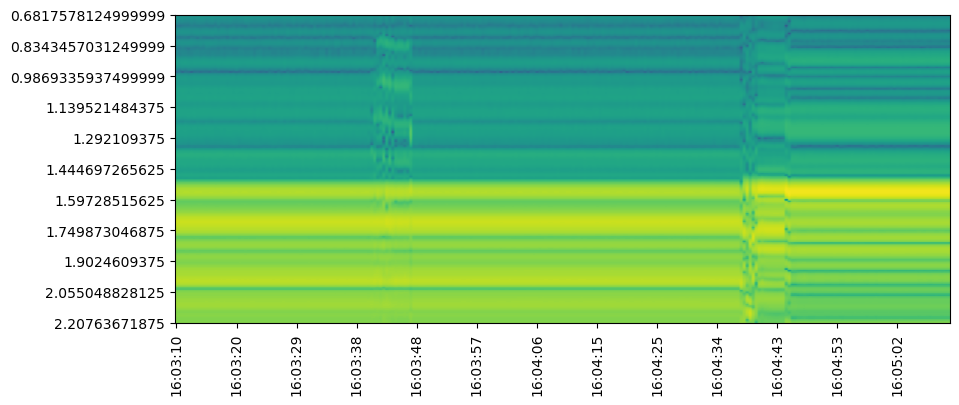

In [21]:
ka_f = 'kuka_stare_decon_Ka-Scat20230807-160311.nc'

kt.plot_file(ka_f,'ka',directory)

ku_f = 'kuka_stare_decon_Ku-Scat20230807-160310.nc'

kt.plot_file(ku_f,'ku',directory)

In [22]:
pitno=5
pits[pitno] = {}
pits[pitno]['ka'] = (16,4,50)
pits[pitno]['ku'] = (16,3,11)
pits[pitno]['ku_file'] = ku_f
pits[pitno]['ka_file'] = ka_f
pits[pitno]['directory'] = directory

# PIT 2

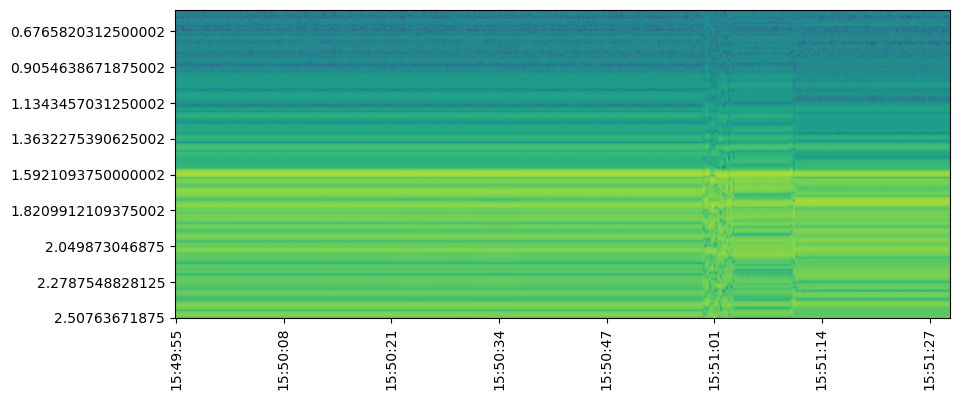

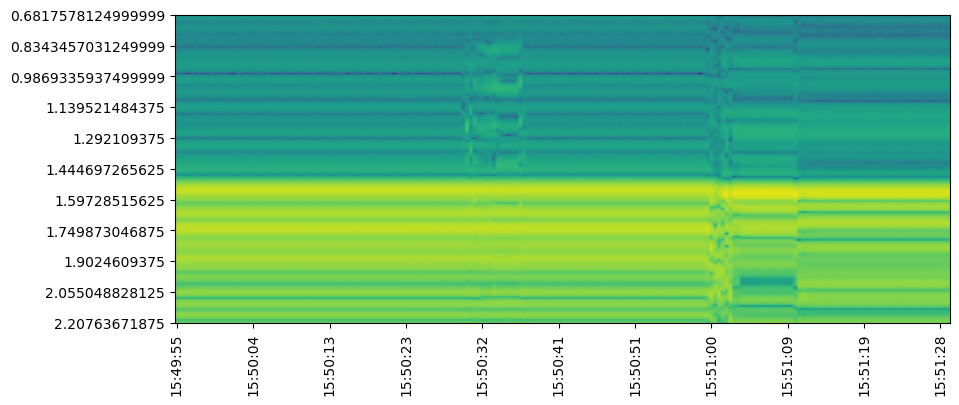

In [23]:
ka_f = 'kuka_stare_decon_Ka-Scat20230807-154955.nc'

kt.plot_file(ka_f,'ka',directory)

ku_f = 'kuka_stare_decon_Ku-Scat20230807-154955.nc'

kt.plot_file(ku_f,'ku',directory)

In [24]:
pitno=2
pits[pitno] = {}
pits[pitno]['ku'] = (15,50,0)
pits[pitno]['ka'] = (15,51,15)
pits[pitno]['ku_file'] = ku_f
pits[pitno]['ka_file'] = ka_f
pits[pitno]['directory'] = directory

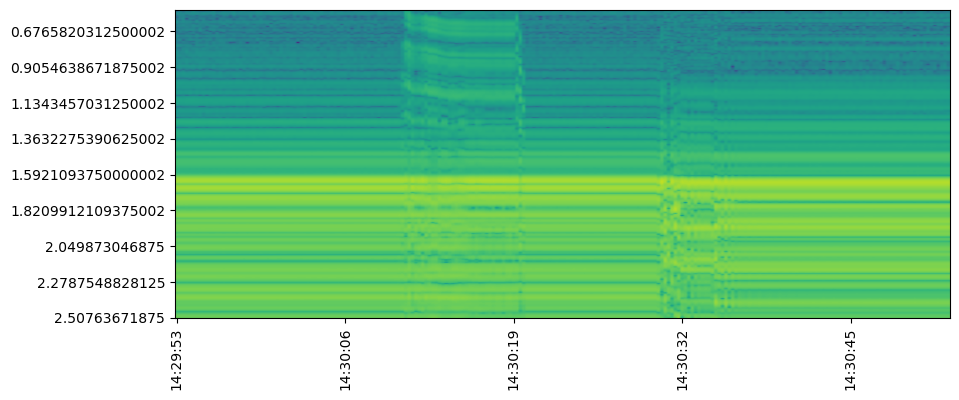

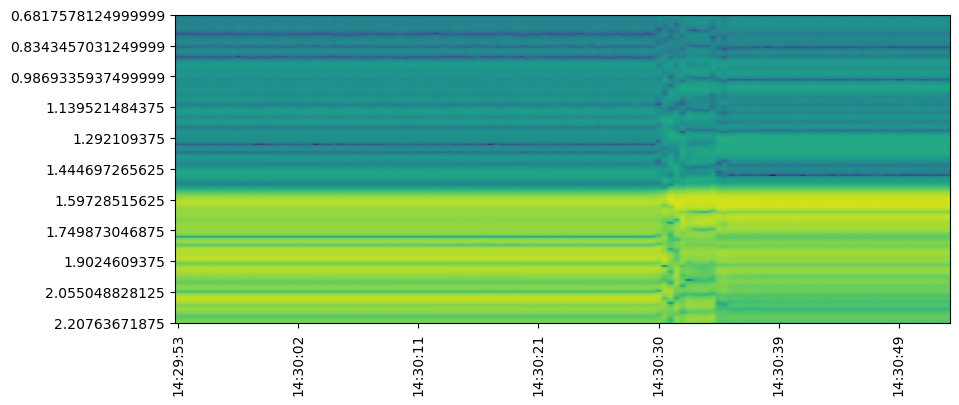

In [26]:
ka_f = 'kuka_stare_decon_Ka-Scat20230828-142953.nc'

kt.plot_file(ka_f,'ka',directory)

ku_f = 'kuka_stare_decon_Ku-Scat20230828-142953.nc'

kt.plot_file(ku_f,'ku',directory)

In [27]:
pitno=0
pits[pitno] = {}
pits[pitno]['ku'] = (14,30,0)
pits[pitno]['ka'] = (14,30,40)
pits[pitno]['ku_file'] = ku_f
pits[pitno]['ka_file'] = ka_f

EXTRA DEEP PIT 28TH August is Pit Number 0

In [28]:
pols = ['hh','vv','hv','vh']

for pitno, data_dict in pits.items():

    y,m,day = kt.get_ymd_from_filename(pits[pitno]['ku_file'])
    
    for freq in ['ka','ku']:

        start_time = datetime.datetime(y,m,day,data_dict[freq][0],data_dict[freq][1],data_dict[freq][2])

        with Dataset(f'{directory}/{data_dict[f"{freq}_file"]}') as d:
            ranges = np.array(d['range'])
            times = np.array([datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(x)) for x in d['start_time']])

            start_ind = kt.get_time_index(start_time,times)
            end_ind = start_ind+5

            for pol in pols:
            
                pits[pitno][f'{freq}_{pol}'] = np.mean(np.array(d[f'{pol}_power_decon0'])[:,start_ind:start_ind+5],axis=1)
                pits[pitno][f'{freq}_range'] = ranges

for freq in ['ka','ku']:

    for h in pits.keys():
    
        data = pits[h]
    
        dic = {pol:data[f'{freq}_{pol}'] for pol in pols}
        
        wvfms = pd.DataFrame(dic)
    
        wvfms.to_csv(f'../data/waveforms/deep_pit_{h}_{freq}.csv')